In [2]:
#importamos las librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
#cargamos las imagenes
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('C:\\Users\\marii\\Downloads\\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 25000 images belonging to 1 classes.


In [16]:
def apply_filters_and_convolutions(image):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Aplicar un filtro de desenfoque (blur)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Aplicar un filtro de detección de bordes (Sobel)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    # Aplicar un filtro de convolución personalizado
    kernel = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])
    custom_convolution = cv2.filter2D(gray_image, -1, kernel)

    return gray_image, blurred_image, sobel_combined, custom_convolution

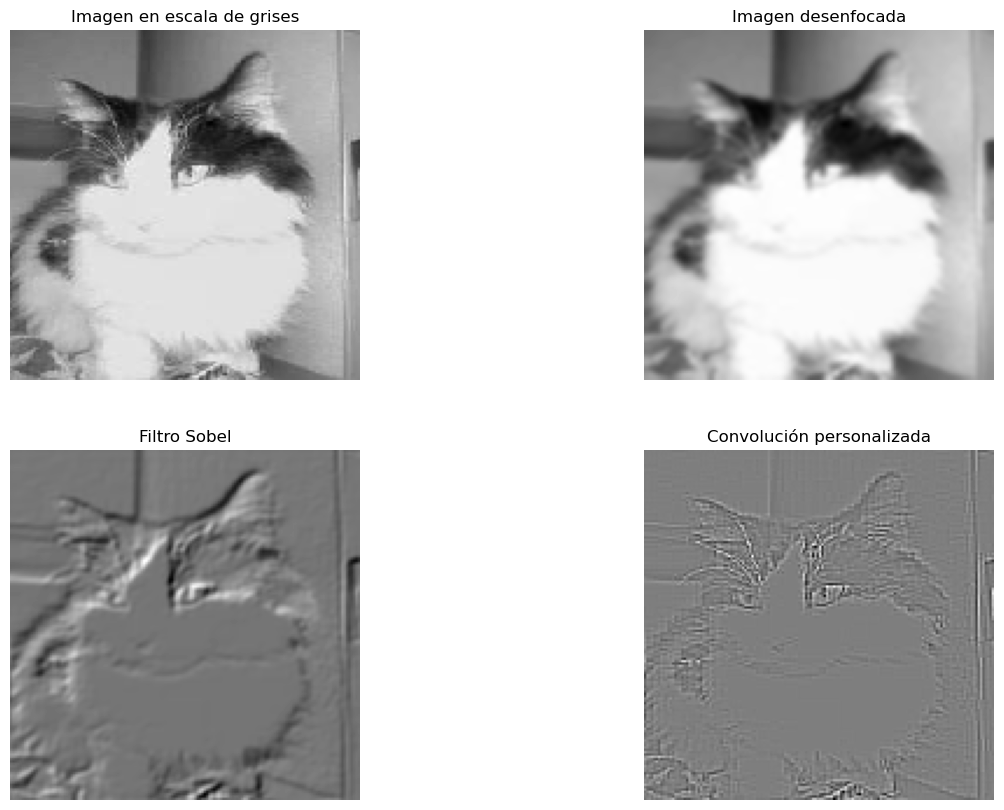

In [23]:
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

images, _ = next(train_generator)

# Aplicar filtros y convoluciones a la primera imagen del batch
gray_image, blurred_image, sobel_combined, custom_convolution = apply_filters_and_convolutions(images[0])

# Mostrar las imágenes resultantes
display_images([gray_image, blurred_image, sobel_combined, custom_convolution],
               ['Imagen en escala de grises', 'Imagen desenfocada', 'Filtro Sobel', 'Convolución personalizada'])